In [1]:
from sklearn.metrics import classification_report, confusion_matrix
from utils import mnist_reader

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import itertools


In [2]:

def show_image(pixels, label, color ="gray"):
    pixels = pixels.reshape((28,28))
    plt.imshow(pixels, cmap=color)
    plt.show()
    

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

In [3]:

X_train, y_train = mnist_reader.load_mnist('data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('data/fashion', kind='t10k')

class_names = np.unique(y_test)


In [4]:
print "X_train = %d \n y_train = %d"%(len(X_train), len(y_train))
print "X_test = %d \n y_test = %d"%(len(X_test), len(y_test))

X_train = 60000 
 y_train = 60000
X_test = 10000 
 y_test = 10000


In [5]:
X_train.shape

(60000L, 784L)

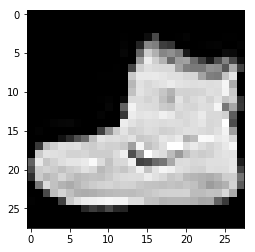

In [6]:
show_image(X_train[0], y_test[0])

In [7]:
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC

clf = DummyClassifier(strategy='prior',random_state=0)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)


0.10000000000000001

## Greatshearch ##
El siguiente link tiene un ejemplo de greatshearch para svc. Se definen distintos parametros y se printea cual de las combinaciones de ellos es la mas optima. Es un procesos costoso que habria que hacer algun dia D:

http://scikit-learn.org/0.18/auto_examples/model_selection/grid_search_digits.html

In [13]:
### Entrenamos la maquina SVM ###
from sklearn import svm

svc = svm.SVC(kernel='poly', degree=2, C=1.0)
svc.fit(X_train, y_train)  


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Confusion matrix, without normalization
[[844   1  19  19   6   2 102   0   7   0]
 [  2 981   5   8   3   0   1   0   0   0]
 [ 32   3 826  12  68   0  58   0   1   0]
 [ 42   8  23 865  26   0  30   0   6   0]
 [  3   1  99  40 804   0  48   0   5   0]
 [  1   0   0   1   0 965   0  16   2  15]
 [144   1  90  26  69   0 663   0   7   0]
 [  0   0   0   0   0  20   0 954   0  26]
 [  7   0   9   4   3   3  10   2 962   0]
 [  0   1   0   0   0  11   1  25   1 961]]


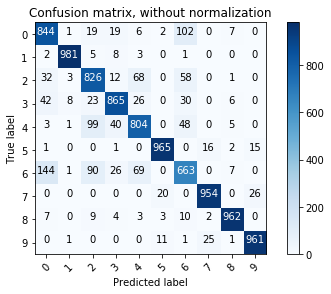

             precision    recall  f1-score   support

          0       0.79      0.84      0.81      1000
          1       0.98      0.98      0.98      1000
          2       0.77      0.83      0.80      1000
          3       0.89      0.86      0.88      1000
          4       0.82      0.80      0.81      1000
          5       0.96      0.96      0.96      1000
          6       0.73      0.66      0.69      1000
          7       0.96      0.95      0.96      1000
          8       0.97      0.96      0.97      1000
          9       0.96      0.96      0.96      1000

avg / total       0.88      0.88      0.88     10000



In [14]:
### Clasificamos SVM ###
y_predict = svc.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_predict)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,title='Confusion matrix, without normalization')
plt.show()

print(classification_report(y_test, y_predict))

In [15]:
### Entrenamos la maquina RandomForest ###
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier() # Creando el modelo
rf.fit(X_train, y_train) # Ajustando el modelo


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Confusion matrix, without normalization
[[844   0  18  34   8   1  86   0   9   0]
 [  7 959   6  22   4   0   1   0   1   0]
 [ 21   0 790   9 114   0  62   0   4   0]
 [ 27   8  10 887  39   0  27   0   2   0]
 [  2   2 143  37 766   0  45   0   5   0]
 [  0   0   0   1   0 954   0  30   3  12]
 [188   1 141  31 100   0 520   0  19   0]
 [  0   0   0   0   0  19   0 945   1  35]
 [  5   2   4   5   6   2  12   5 957   2]
 [  0   0   0   0   0  20   0  43   2 935]]


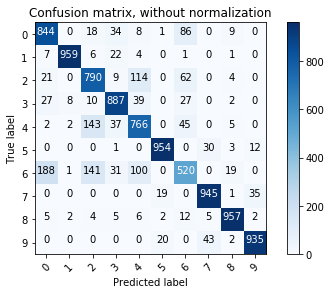

             precision    recall  f1-score   support

          0       0.77      0.84      0.81      1000
          1       0.99      0.96      0.97      1000
          2       0.71      0.79      0.75      1000
          3       0.86      0.89      0.88      1000
          4       0.74      0.77      0.75      1000
          5       0.96      0.95      0.96      1000
          6       0.69      0.52      0.59      1000
          7       0.92      0.94      0.93      1000
          8       0.95      0.96      0.96      1000
          9       0.95      0.94      0.94      1000

avg / total       0.85      0.86      0.85     10000



In [16]:
### Clasificamos RandomForest ###
predict = rf.predict(X_test)
cnf_matrix = confusion_matrix(y_test, predict)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,title='Confusion matrix, without normalization')
plt.show()

print(classification_report(y_test, predict, class_names))

In [17]:
# MEDIMOS PREDICCION DE SVC
from sklearn.metrics import f1_score

f1_score(y_test, y_predict, average='macro')  
f1_score(y_test, y_predict, average='micro')  
f1_score(y_test, y_predict, average='weighted')  
f1_score(y_test, y_predict, average=None)

array([ 0.81349398,  0.98296593,  0.79768228,  0.87594937,  0.81253158,
        0.96451774,  0.69315212,  0.95543315,  0.96634857,  0.96003996])

from sklearn.neural_network import MLPClassifier
from timeit import default_timer as timer
redNeuronal = MLPClassifier(max_iter=1000, hidden_layer_sizes=(100,250,500,1000))
#La cantidad de iteraciones = 1000
#Capas ocultas = [10,25,50,100]

comienzo = timer()
redNeuronal.fit(X_train, y_train)
fin = timer() - comienzo
print("Tiempo red neuronal:",fin, " segundos")

indicador = redNeuronal.score(X_test, y_test)
if indicador > 0.5 and indicador < 1:
    print("Entrenado")
else:
    if indicador == 1.0:
        print("Sobreentrenado")
    else:
        print("Falta entrenamiento")
print (indicador)

predict = redNeuronal.predict(X_test)
cnf_matrix = confusion_matrix(y_test, predict)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,title='Confusion matrix red neuronal, sin normalization')
plt.show()

print(classification_report(y_test, predict, class_names))

from timeit import default_timer as timer
from lasagne.layers import InputLayer, Conv2DLayer, DropoutLayer, MaxPool2DLayer, DenseLayer
from lasagne.nonlinearities import rectify

import theano
import lasagne
from lasagne.updates import nesterov_momentum
from nolearn.lasagne import NeuralNet
from lasagne.layers import InputLayer, Conv2DLayer, DropoutLayer,MaxPool2DLayer, DenseLayer
from lasagne.objectives import categorical_crossentropy
from nolearn.lasagne import BatchIterator

arquitectura1 = [
                (InputLayer, {'shape': (None, 1, 28, 28)}), #cantidad, canal(monocromatico),col,filas
               (Conv2DLayer, {'num_filters':5, 'filter_size': 10, 'W': lasagne.init.GlorotUniform()}),
                (MaxPool2DLayer, {'pool_size': 2}),
             (Conv2DLayer, {'num_filters':5, 'filter_size': 5, 'W': lasagne.init.GlorotUniform()}),
                (MaxPool2DLayer, {'pool_size': 2}),
                (DenseLayer, {'num_units': 10}),
                (DropoutLayer, {'p': 0.5}),
                (DenseLayer, {'num_units': 10}),
                (DenseLayer, {'num_units': 10, 'nonlinearity': lasagne.nonlinearities.softmax}),
        ]#parametros 1565 score=0.02

arquitectura2 = [
                (InputLayer, {'shape': (None, 1, 28, 28)}), #cantidad, canal(monocromatico),col,filas
               (Conv2DLayer, {'num_filters':1, 'filter_size': 10, 'W': lasagne.init.GlorotUniform()}),
                (MaxPool2DLayer, {'pool_size': 2}),
             (Conv2DLayer, {'num_filters':1, 'filter_size': 5, 'W': lasagne.init.GlorotUniform()}),
                (MaxPool2DLayer, {'pool_size': 2}),
                (DenseLayer, {'num_units': 10}),
                (DropoutLayer, {'p': 0.5}),
                (DenseLayer, {'num_units': 10, 'nonlinearity': lasagne.nonlinearities.softmax}),
        ]#287 parametros score = 0.02
arquitectura3 = [
                (InputLayer, {'shape': (None, 1, 28, 28)}), #cantidad, canal(monocromatico),col,filas
                (Conv2DLayer, {'num_filters':5, 'filter_size': 3, 'W': lasagne.init.GlorotUniform()}),
                (Conv2DLayer, {'num_filters':5, 'filter_size': 2, 'W': lasagne.init.GlorotUniform()}),
                (Conv2DLayer, {'num_filters':5, 'filter_size': 1, 'W': lasagne.init.GlorotUniform()}),
                (MaxPool2DLayer, {'pool_size': 2}),
                (DenseLayer, {'num_units': 10}),
                (DropoutLayer, {'p': 0.5}),
                (DenseLayer, {'num_units': 10, 'nonlinearity': lasagne.nonlinearities.softmax}),
        ]## Neural Network with 7505 learnable parameters, score 0.02
arquitectura4 = [
                (InputLayer, {'shape': (None, 1, 28, 28)}), #cantidad, canal(monocromatico),col,filas
                (Conv2DLayer, {'num_filters':10, 'filter_size': 10, 'W': lasagne.init.GlorotUniform()}),
                (Conv2DLayer, {'num_filters':10, 'filter_size': 5, 'W': lasagne.init.GlorotUniform()}),
                (Conv2DLayer, {'num_filters':10, 'filter_size': 2, 'W': lasagne.init.GlorotUniform()}),
                (MaxPool2DLayer, {'pool_size': 2}),
                (Conv2DLayer, {'num_filters':10, 'filter_size': 5, 'W': lasagne.init.GlorotUniform()}),
                (DenseLayer, {'num_units': 100}),
                (DropoutLayer, {'p': 0.5}),
                (DenseLayer, {'num_units': 10, 'nonlinearity': lasagne.nonlinearities.softmax}),
        ]#Network with 16550 learnable parameters, score=0.1, tiempo
arquitectura5 = [
                (InputLayer, {'shape': (None, 1, 28, 28)}), #cantidad, canal(monocromatico),col,filas
                (Conv2DLayer, {'num_filters':100, 'filter_size': 3, 'W': lasagne.init.GlorotUniform()}),
                (MaxPool2DLayer, {'pool_size': 2}),
                (DropoutLayer, {'p': 0.5}),
                (DenseLayer, {'num_units': 10, 'nonlinearity': lasagne.nonlinearities.softmax}),
        ]#0.32 score, tiempo 871.16 sg, parametros 170 mil

arquitectura6 = [
                (InputLayer, {'shape': (None, 1, 28, 28)}), #cantidad, canal(monocromatico),col,filas
                (Conv2DLayer, {'num_filters':100, 'filter_size': 10, 'W': lasagne.init.GlorotUniform()}),
                (Conv2DLayer, {'num_filters':10, 'filter_size': 5, 'W': lasagne.init.GlorotUniform()}),
                (MaxPool2DLayer, {'pool_size': 2}),
                (Conv2DLayer, {'num_filters':10, 'filter_size': 2, 'W': lasagne.init.GlorotUniform()}),
                (DropoutLayer, {'p': 0.5}),
                (DenseLayer, {'num_units': 10, 'nonlinearity': lasagne.nonlinearities.softmax}),
        ]#0.1 score, tiempo cortado, parametros 39130 

arquitectura7 = [
                (InputLayer, {'shape': (None, 1, 28, 28)}), #cantidad, canal(monocromatico),col,filas
                (Conv2DLayer, {'num_filters':100, 'filter_size': (3,3), 'W': lasagne.init.GlorotUniform()}),
                (MaxPool2DLayer, {'pool_size': 2}),
                (DropoutLayer, {'p': 0.25}),
                (DenseLayer, {'num_units': 10, 'nonlinearity': lasagne.nonlinearities.softmax}),
        ]# empezo con score 0.28, tiempo sg, parametros 
arquitectura8 = [
                (InputLayer, {'shape': (None, 1, 28, 28)}), #cantidad, canal(monocromatico),col,filas
                (Conv2DLayer, {'num_filters':100, 'filter_size': (3,3), 'W': lasagne.init.GlorotUniform()}),
                (Conv2DLayer, {'num_filters':100, 'filter_size': (2,2), 'W': lasagne.init.GlorotUniform()}),
                (MaxPool2DLayer, {'pool_size': 2}),
                (DropoutLayer, {'p': 0.25}),
                (DenseLayer, {'num_units': 10, 'nonlinearity': lasagne.nonlinearities.softmax}),
        ]# score: 0.10, tiempo sg, parametros 185110
arquitectura9 = [
                (InputLayer, {'shape': (None, 1, 28, 28)}), #cantidad, canal(monocromatico),col,filas
                (Conv2DLayer, {'num_filters':100, 'filter_size': (3,3), 'W': lasagne.init.GlorotUniform()}),
                (Conv2DLayer, {'num_filters':100, 'filter_size': (4,4), 'W': lasagne.init.GlorotUniform()}),
                (MaxPool2DLayer, {'pool_size': 2}),
                (Conv2DLayer, {'num_filters':100, 'filter_size': (5,5), 'W': lasagne.init.GlorotUniform()}),
                (DropoutLayer, {'p': 0.25}),
                (DenseLayer, {'num_units': 10, 'nonlinearity': lasagne.nonlinearities.softmax}),
        ]# score 0.1, tiempo sg 11992, parametros 460210  
arquitectura10 = [
                (InputLayer, {'shape': (None, 1, 28, 28)}), #cantidad, canal(monocromatico),col,filas
                (Conv2DLayer, {'num_filters':1000, 'filter_size': (3,3), 'W': lasagne.init.GlorotUniform()}),
                (MaxPool2DLayer, {'pool_size': 2}),
                (DropoutLayer, {'p': 0.25}),
                (DenseLayer, {'num_units': 10, 'nonlinearity': lasagne.nonlinearities.softmax}),
]#Score 0.57     tiempo 14000sg  parametros 1700010
arquitectura11 = [
                (InputLayer, {'shape': (None, 1, 28, 28)}), #cantidad, canal(monocromatico),col,filas
                (Conv2DLayer, {'num_filters':100, 'filter_size': (3,3), 'W': lasagne.init.GlorotUniform()}),
                 (Conv2DLayer, {'num_filters':100, 'filter_size': (2,2), 'W': lasagne.init.GlorotUniform()}),
                    (Conv2DLayer, {'num_filters':100, 'filter_size': (5,5), 'W': lasagne.init.GlorotUniform()}),
                (MaxPool2DLayer, {'pool_size': 2}),
                (DropoutLayer, {'p': 0.25}),
                (DenseLayer, {'num_units': 10, 'nonlinearity': lasagne.nonlinearities.softmax}),
]#Score  0.1    tiempo mucho  parametros 391210 

arquitecturaLeandro = [
    (InputLayer, {'shape': (None, 1, 28, 28)}), #cantidad, canal(monocromatico),col,filas
               
               (Conv2DLayer, {'num_filters':32, 'filter_size': 3, 'W': lasagne.init.GlorotUniform(), 
                             'nonlinearity': lasagne.nonlinearities.rectify}),
               (MaxPool2DLayer, {'pool_size': 2}),
               (DropoutLayer, {'p': 0.25}),
               
               (Conv2DLayer, {'num_filters':64, 'filter_size': 3, 'W': lasagne.init.GlorotUniform(),
                             'nonlinearity': lasagne.nonlinearities.rectify}),
               (MaxPool2DLayer, {'pool_size': 2}),
               (DropoutLayer, {'p': 0.25}),
               
               (Conv2DLayer, {'num_filters':128, 'filter_size': 3, 'W': lasagne.init.GlorotUniform(),
                             'nonlinearity': lasagne.nonlinearities.rectify}),
               (MaxPool2DLayer, {'pool_size': 2}),
               (DropoutLayer, {'p': 0.4}),
               
               #(FlattenLayer,{}),
               (DenseLayer, {'num_units': 128, 'nonlinearity': lasagne.nonlinearities.rectify}),
               (DropoutLayer, {'p': 0.3}),
               (DenseLayer, {'num_units': 128, 'nonlinearity': lasagne.nonlinearities.rectify}),
               
               (DenseLayer, {'num_units': 10, 'nonlinearity': lasagne.nonlinearities.softmax})]

class AdjustVariable(object):

    def __init__(self, name, start=0.03, stop=0.001):
        self.name = name
        self.start, self.stop = start, stop
        self.ls = None
    
    def __call__(self, nn, train_history):
        if self.ls is None:
            self.ls = np.linspace(self.start, self.stop, nn.max_epochs)
        epoch = train_history[-1]['epoch']
        new_value = np.float32(self.ls[epoch - 1])
        getattr(nn, self.name).set_value(new_value)

def create_net(max_epochs):
    return NeuralNet(
        layers= arquitecturaLeandro,
        update=nesterov_momentum,
        update_learning_rate=0.01,
        update_momentum=0.9,
        regression=False,
        objective_loss_function=categorical_crossentropy,
        batch_iterator_train=BatchIterator(batch_size=128),
        on_epoch_finished=[
            AdjustVariable('update_learning_rate', start=0.03, stop=0.001),
            AdjustVariable('update_momentum', start=0.9, stop=0.9999)  # ,
        ],
        max_epochs=max_epochs,
        verbose=1)


from sklearn.cross_validation import train_test_split


print (X_train.shape)
print (y_train.shape)
x = X_train.reshape(60000, 1, 28, 28)
print(x.shape)
print(x[0,0].shape)
show_image(x[0,0],'hola')

# RED NEURONAL CONVULCIONADA

net = None
epoch = 5
net = create_net(epoch)
comienzo = timer()
net.fit(x, y_train)
fin = timer() - comienzo
print("Tiempo red neuronal convulcionada:",fin, " segundos con epoch:",epoch)



from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from nolearn.lasagne import visualize

X_test.shape
XTEST = X_test.reshape(10000,1,28,28)
XTEST.shape
print(y_test.shape)

print (classification_report(y_test, net.predict(XTEST)))


import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm

%matplotlib inline
visualize.plot_loss(net)

In [18]:
import pickle
with open('SVM.pickle', 'wb') as f:
        pickle.dump(svc, f, -1)
        
with open('SVM.pickle', 'wb') as f3:
        pickle.dump(clf, f3, -1)
        
with open('Randomforest.pickle', 'wb') as f2:
        pickle.dump(rf, f2, -1)

net2 = None
with open('clasificadorNET.pickle', 'rb') as f:
       net2 = pickle.load(f)

print(y_test[0])
print (y_test[1])
print (y_test[2])

net2.predict(x)